In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 

In [ ]:
df=pd.read_csv('/content/xAPI-Edu-Data.csv')
print(df.head())

  gender NationalITy  ... StudentAbsenceDays Class
0      M          KW  ...            Under-7     M
1      M          KW  ...            Under-7     M
2      M          KW  ...            Above-7     L
3      M          KW  ...            Above-7     L
4      M          KW  ...            Above-7     M

[5 rows x 17 columns]


In [ ]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of     gender NationalITy  ... StudentAbsenceDays Class
0        M          KW  ...            Under-7     M
1        M          KW  ...            Under-7     M
2        M          KW  ...            Above-7     L
3        M          KW  ...            Above-7     L
4        M          KW  ...            Above-7     M
..     ...         ...  ...                ...   ...
475      F      Jordan  ...            Above-7     L
476      F      Jordan  ...            Under-7     M
477      F      Jordan  ...            Under-7     M
478      F      Jordan  ...            Above-7     L
479      F      Jordan  ...            Above-7     L

[480 rows x 17 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
df.drop(columns='PlaceofBirth',inplace=True)

In [ ]:
df.head(12)

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


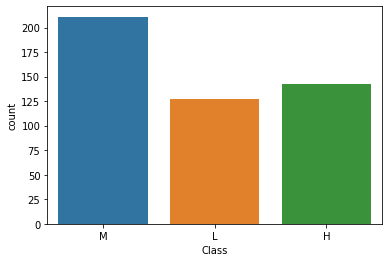

In [ ]:
sns.countplot(x='Class', data=df)

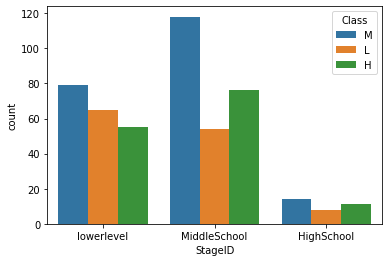

In [ ]:
sns.countplot(x='StageID',hue='Class', data=df)

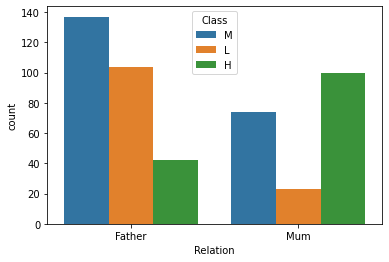

In [ ]:
sns.countplot(x='Relation', hue='Class', data=df)

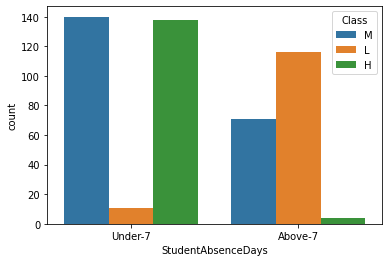

In [ ]:
sns.countplot(x='StudentAbsenceDays', hue='Class', data=df)

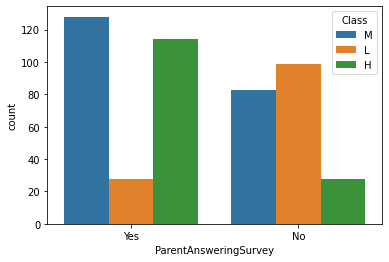

In [ ]:
sns.countplot(x='ParentAnsweringSurvey', hue='Class', data=df)

In [ ]:
X = df.drop(columns='Class')
y = df['Class']

In [ ]:
print(list(X.columns))

['gender', 'NationalITy', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays']


In [ ]:
print(y)

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object


In [ ]:
X = pd.get_dummies(X)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = MLPClassifier(random_state=42, max_iter=2000)
model.fit(train_X, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions = model.predict(test_X)

In [ ]:
predictions

array(['M', 'L', 'H', 'H', 'H', 'M', 'L', 'M', 'M', 'M', 'H', 'H', 'M',
       'L', 'M', 'H', 'L', 'M', 'L', 'M', 'M', 'H', 'M', 'M', 'L', 'L',
       'H', 'M', 'L', 'M', 'M', 'M', 'L', 'M', 'M', 'H', 'M', 'M', 'M',
       'M', 'H', 'M', 'L', 'M', 'H', 'L', 'H', 'M', 'H', 'M', 'M', 'M',
       'L', 'M', 'M', 'H', 'L', 'H', 'M', 'L', 'M', 'L', 'L', 'H', 'M',
       'M', 'L', 'H', 'L', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'L',
       'L', 'H', 'H', 'M', 'M', 'H', 'M', 'M', 'M', 'L', 'L', 'M', 'M',
       'M', 'M', 'M', 'L', 'H', 'L', 'H', 'M', 'L', 'M', 'L', 'L', 'H',
       'M', 'H', 'H', 'L', 'M', 'L', 'M', 'M', 'M', 'H', 'M', 'L', 'H',
       'M', 'H', 'L'], dtype='<U1')

In [ ]:
ip_arr=df['raisedhands'].tolist()[0:5]

In [ ]:
op_arr=predictions.tolist()[0:5]

In [ ]:
def predict_performance(ip_arr):
  for i in op_arr:
    if (i=='M'):
      print("Above avg")
    elif (i=='L'):
      print("Below avg")
    else:
      print("Good")

predict_performance(ip_arr)

Above avg
Below avg
Good
Good
Good


In [ ]:
pip install gradio

In [ ]:
import gradio as gr
ip=test_X
def pred(ip):
  op=model.predict(ip)
  op_list = op.tolist()[0:5]
  j=1
  for i in op_list:
    print('Student',j,'Performance : ',end="")
    if (i=='M'):
      print("Above avg")
    elif (i=='L'):
      print("Below avg")
    else:
      print("Good")
    j=j+1
pred(ip)

Student 1 Performance : Above avg
Student 2 Performance : Below avg
Student 3 Performance : Good
Student 4 Performance : Good
Student 5 Performance : Good


In [ ]:
cm = confusion_matrix(test_y, predictions)
cm

array([[22,  0,  6],
       [ 0, 27,  7],
       [ 7,  4, 47]])

In [ ]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           H       0.76      0.79      0.77        28
           L       0.87      0.79      0.83        34
           M       0.78      0.81      0.80        58

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120



In [ ]:
print("accuracy: ", accuracy_score(test_y, predictions))

accuracy:  0.8


In [ ]:
X[:]['raisedhands'].mean()

46.775

In [ ]:
X[:]['Discussion'].mean()

43.28333333333333

In [ ]:
X[:]['VisITedResources'].mean()

54.797916666666666

In [ ]:
X[3:4]['AnnouncementsView'].tolist()

[5]

In [ ]:
X[4:5]

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,StageID_HighSchool,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-02,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_A,SectionID_B,SectionID_C,Topic_Arabic,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
4,40,50,12,50,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
X[4:5]['StudentAbsenceDays_Under-7']

4    0
Name: StudentAbsenceDays_Under-7, dtype: uint8

In [ ]:
dfs[3:4]

In [ ]:

def pred(j):
  ip=X[j-1:j]
  l=""
  op=model.predict(ip)
  op_list = op.tolist()
  if(op_list[0]=='M'):
    stat= "Above average"
  elif(op_list[0]=='L'):
    stat = "Below average"
  elif(op_list[0]=='H'):
    stat = "Good"
  exp ="Student performance : {}       ".format(stat) 
  l=l+exp
  if(stat=="Below average"):
    if(X[j-1:j]['raisedhands'].tolist()[0]<40):
      r1="Not interacting"
      rs1="Reasons found : {}"  .format(r1)
      l=l+rs1
    if(X[j-1:j]['StudentAbsenceDays_Under-7'].tolist()[0]==1):
      r2="Less attendance"
      rs2=", {} " .format(r2)
      l=l+rs2
    if(X[j-1:j]['AnnouncementsView'].tolist()[0]<40):
      r3="Not viewing class announcements regularly"
      rs3=", {} " .format(r3)
      l=l+rs3
  return l
pred(89)

'Student performance : Below average       Reasons found : Not interacting, Less attendance , Not viewing class announcements regularly '

In [ ]:
To = gr.inputs.Slider(minimum=0, maximum=120, default=0, label="Roll No.")

In [ ]:
gr.Interface(pred, [To], "label", live=True).launch();

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://23602.gradio.app
Interface loading below...
